# Sistema de IA para triaje de pacientes con tendinopatía calcificada del manguito rotador, susceptible para lavado percutáneo guiado por ecografía

### Hospital Universitario Rey Juan Carlos - Diagnóstico por imagen	


#### Javier Álvarez Benito y Javier Pozo Ocampo

In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras import models

In [2]:
data = pd.read_excel('calcific_tendinopathy_ddbb.xlsx')

In [3]:
data.head(30)

,image,calcium,pat_id,type,localization
0,0072879_001.png,1,72879,2,supraespinoso
1,0072879_002.png,1,72879,2,supraespinoso
2,00326955M_001.png,1,326955M,3,supraespinoso
3,00326955M_002.png,1,326955M,3,supraespinoso
4,0094847_001.png,0,94847,-1,NaN
5,00486523M_001.png,1,486523M,2,infraespinoso
6,00486523M_002.png,1,486523M,2,infraespinoso
7,00564810_001.png,1,564810,1,supraespinoso
8,00564810_002.png,1,564810,1,supraespinoso
9,00782404_001.png,1,782404,1,supraespinoso


In [24]:
def dibujar_imagen_calcio(image):
    img = io.imread(image,as_gray=True)
    img = img/np.max(img)
    plt.figure(figsize=(10,10)) 
    plt.imshow(img, cmap=plt.cm.gray)
    plt.title('Imagen con calcio',fontsize = 20),plt.axis('off')
    return img

array([[0.07313373, 0.07313373, 0.07313373, ..., 0.38262431, 0.31876314,
        0.25601804],
       [0.07313373, 0.07313373, 0.07313373, ..., 0.29777922, 0.29777922,
        0.25601804],
       [0.07313373, 0.07313373, 0.07313373, ..., 0.31876314, 0.29777922,
        0.28739059],
       ...,
       [0.09523373, 0.10562235, 0.09523373, ..., 0.60615373, 0.57478118,
        0.58600314],
       [0.09523373, 0.10562235, 0.09523373, ..., 0.58600314, 0.58600314,
        0.58600314],
       [0.09523373, 0.10562235, 0.09523373, ..., 0.61737569, 0.55463059,
        0.52325804]])

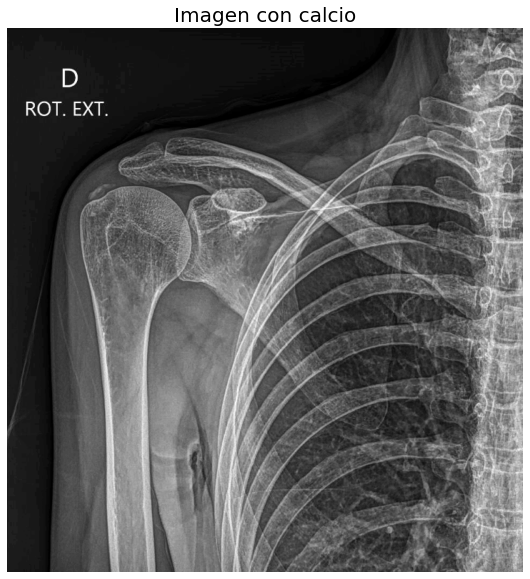

In [25]:
dibujar_imagen_calcio(data.image[0])    

array([[0.        , 0.        , 0.        , ..., 0.84202118, 0.80784314,
        0.8630051 ],
       [0.        , 0.        , 0.        , ..., 0.82602157, 0.8630051 ,
        0.8630051 ],
       [0.        , 0.        , 0.        , ..., 0.80784314, 0.89437765,
        0.87339373],
       ...,
       [0.        , 0.        , 0.        , ..., 0.64986431, 0.64986431,
        0.70222078],
       [0.        , 0.        , 0.        , ..., 0.58600314, 0.54340863,
        0.61737569],
       [0.        , 0.        , 0.        , ..., 0.54340863, 0.54340863,
        0.52325804]])

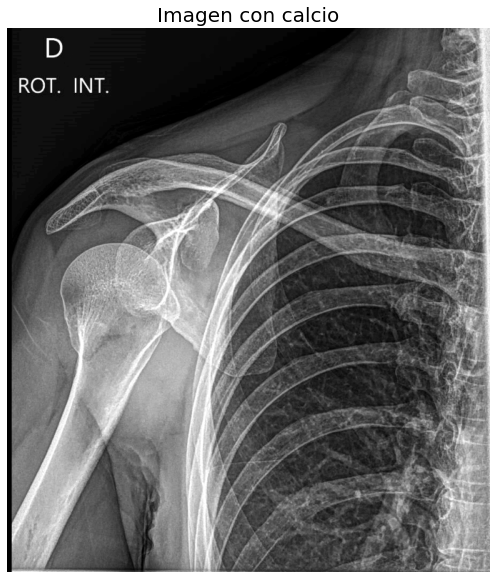

In [12]:
dibujar_imagen_calcio(data.image[1])

In [13]:
def dibujar_imagen_nocalcio(image):
    img = io.imread(image,as_gray=True)
    img = img/np.max(img)
    
    plt.figure(figsize=(10,10))         
    plt.imshow(img, cmap=plt.cm.gray)               
    plt.title('Imagen sin calcio',fontsize = 20),plt.axis('off')
    
    return img

array([[0.0627451 , 0.04176118, 0.04176118, ..., 0.01122196, 0.        ,
        0.01122196],
       [0.0627451 , 0.0627451 , 0.04176118, ..., 0.01122196, 0.        ,
        0.01122196],
       [0.0627451 , 0.0627451 , 0.04176118, ..., 0.01122196, 0.        ,
        0.01122196],
       ...,
       [0.8630051 , 0.76496588, 0.76496588, ..., 0.01122196, 0.01122196,
        0.03137255],
       [0.89437765, 0.80784314, 0.84202118, ..., 0.01122196, 0.01122196,
        0.03137255],
       [0.90476627, 0.8630051 , 0.84202118, ..., 0.01122196, 0.01122196,
        0.01122196]])

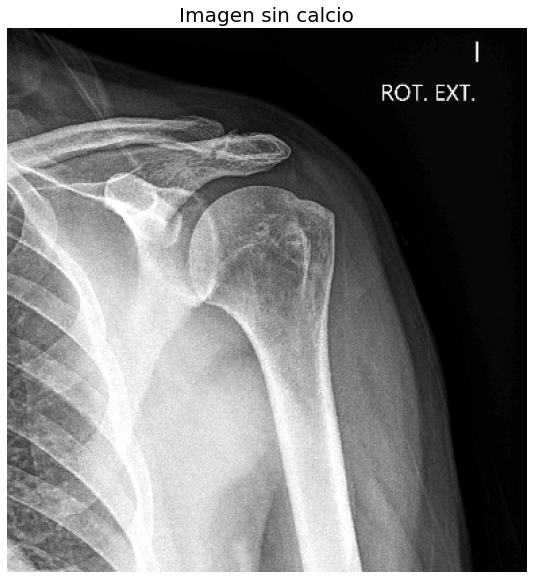

In [14]:
dibujar_imagen_nocalcio(data.image[4])

array([[0.01122196, 0.01122196, 0.01122196, ..., 0.1369949 , 0.1369949 ,
        0.1369949 ],
       [0.01122196, 0.01122196, 0.01122196, ..., 0.15797882, 0.15797882,
        0.15797882],
       [0.01122196, 0.01122196, 0.01122196, ..., 0.1369949 , 0.15797882,
        0.1369949 ],
       ...,
       [0.07313373, 0.0627451 , 0.09523373, ..., 0.55463059, 0.58600314,
        0.57478118],
       [0.07313373, 0.07313373, 0.10562235, ..., 0.61737569, 0.58600314,
        0.60615373],
       [0.07313373, 0.10562235, 0.12660627, ..., 0.61737569, 0.60615373,
        0.58600314]])

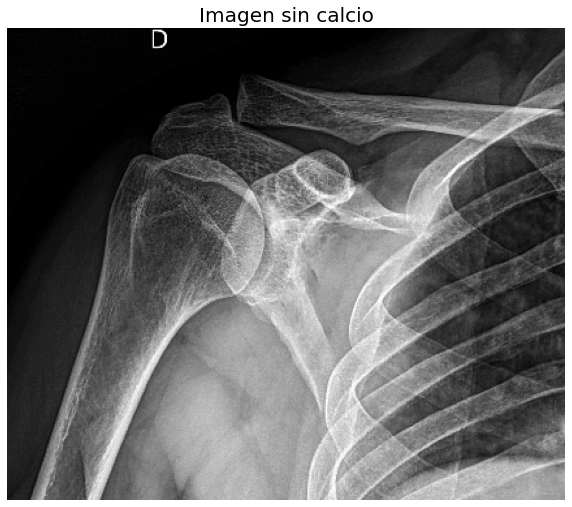

In [15]:
dibujar_imagen_nocalcio(data.image[19])

## Conjunto Train y Test

In [12]:
#Creamos el conjunto de entrada (x) y conjunto de salida (y)
x = data['image']
y = data['calcium']
x.shape, y.shape

((27,), (27,))

In [13]:
#Aleatorizamos  los datos 
x = tensorflow.random.shuffle(x) 
y = tensorflow.random.shuffle(y)

tf.Tensor(
[b'00154163_002.png' b'00564810_001.png' b'00413502_002.png'
 b'0072879_001.png' b'00564810_002.png' b'00782404_001.png'
 b'00RCV_002.png' b'00310569_001.png' b'001460582_001.png'
 b'00326955M_001.png' b'00782404_002.png' b'00190904_002.png'
 b'0094847_001.png' b'00486523M_002.png' b'00413502_001.png'
 b'00326955M_002.png' b'00190904_001.png' b'00RCV_001.png'
 b'001460682_002.png' b'00310569_002.png' b'004278399Z_002.png'
 b'004278399Z_001.png' b'00486523M_001.png' b'001460582_002.png'
 b'0072879_002.png' b'00154163_001.png' b'001460682_001.png'], shape=(27,), dtype=string)


In [18]:
#Dividimos los datos en entrenamiento y en test  70% - 30%
X_train = x[:int((70*len(x))/100)]
X_test =  x[1+len(X_train):]
Y_train = y[:int((70*len(y))/100)]
Y_test =  y[1+len(Y_train):]

## Diseñamos la CNN

In [21]:
model = tensorflow.keras.Sequential([
    # Block One
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same',
                  input_shape=[128, 128, 3]),
    layers.MaxPool2D(),

    # Block Two
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Three
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Head
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid'),
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0

In [23]:
model.compile(
    optimizer=tensorflow.keras.optimizers.Adam(epsilon=0.01),
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy']
)

In [24]:
history = model.fit(
    X_train,
    validation_data=Y_train,
    epochs=5,
)

ValueError: Error when checking input: expected conv2d_input to have 4 dimensions, but got array with shape (18, 1)

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();